# Adult Income Data Analysis

This project analyzes how demographic factors affect income using the Adult Census dataset.


## 1️⃣ Import Libraries

We start by importing necessary Python libraries for data analysis and visualization.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


## 2️⃣ Load Dataset

We load the Adult Census dataset (`adult.data`) and assign proper column names.


In [17]:
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race',
    'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
    'native-country', 'salary'
]

df = pd.read_csv("adult.data", names=columns, sep=',', skipinitialspace=True)

## 3️⃣ Data Overview

Let's take a first look at the data to understand its structure and content.


In [18]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [20]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [21]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')


In [22]:
df.columns = df.columns.str.strip()

## 4️⃣ Data Cleaning

Steps we perform:
- Strip extra spaces from all column names and string values.
- Replace missing values (`?`) with NaN.
- Drop rows with missing values.
- Drop unnecessary columns (`capital-gain`, `capital-loss`).


In [23]:
# Remove extra spaces
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Replace missing values
df.replace('?', pd.NA, inplace=True)

# Drop missing rows
df.dropna(inplace=True)

# Drop unnecessary columns
df.drop(columns=['capital-gain', 'capital-loss'], inplace=True)


In [16]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'hours-per-week', 'native-country', 'salary'],
      dtype='object')


## 5️⃣ Save Cleaned Dataset

We save the cleaned data for future use.


In [24]:
df.to_csv("adult_cleaned.csv", index=False)

In [33]:
df.groupby("salary")["age"].mean()

salary
<=50K    36.60806
>50K     43.95911
Name: age, dtype: float64

'C:\\Users\\Ammar'

In [34]:
df.groupby("salary")["hours-per-week"].mean()

salary
<=50K    39.348592
>50K     45.706580
Name: hours-per-week, dtype: float64

In [35]:
df[df["salary"] == ">50K"]["occupation"].value_counts().head(10)

occupation
Exec-managerial      1937
Prof-specialty       1811
Sales                 970
Craft-repair          908
Adm-clerical          498
Transport-moving      319
Tech-support          278
Machine-op-inspct     245
Protective-serv       210
Other-service         132
Name: count, dtype: int64

In [ ]:
df.groupby("education")["salary"].value_counts(normalize=True).unstack()

## 6️⃣ Age Distribution

We visualize the distribution of ages in the dataset using a histogram.


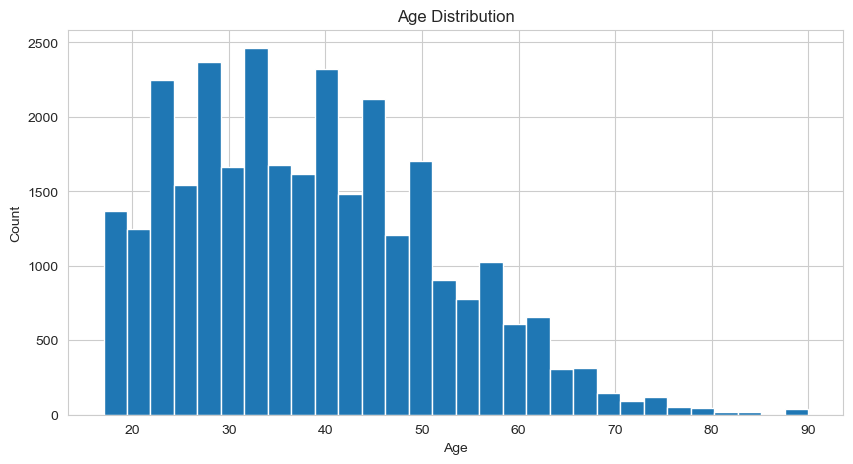

In [26]:
plt.figure(figsize=(10,5))
df['age'].hist(bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## 7️⃣ Does Age Affect Income?

We use a boxplot to check if age has an effect on income levels.


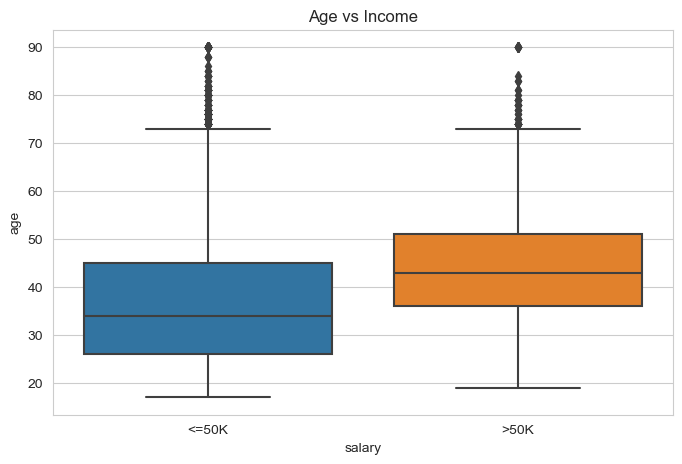

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x='salary', y='age', data=df)
plt.title("Age vs Income")
plt.show()

## 8️⃣ Education Level vs Income

We visualize how education level relates to earning more than 50K.


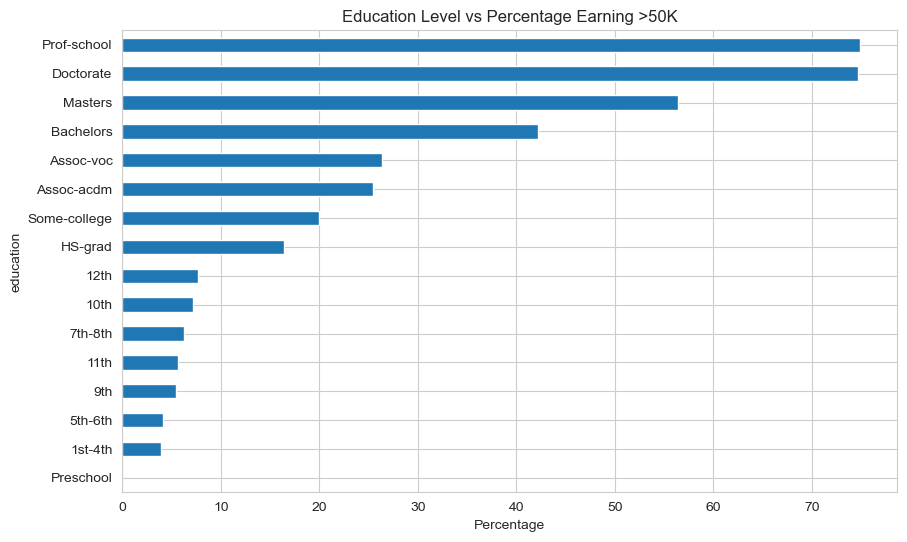

In [28]:
education_income = (
    df.groupby('education')['salary']
    .apply(lambda x: (x == '>50K').mean() * 100)
    .sort_values()
)

education_income.plot(kind='barh', figsize=(10,6))
plt.title("Education Level vs Percentage Earning >50K")
plt.xlabel("Percentage")
plt.show()

## 9️⃣ Working Hours vs Income

We check whether number of hours worked per week correlates with higher income.


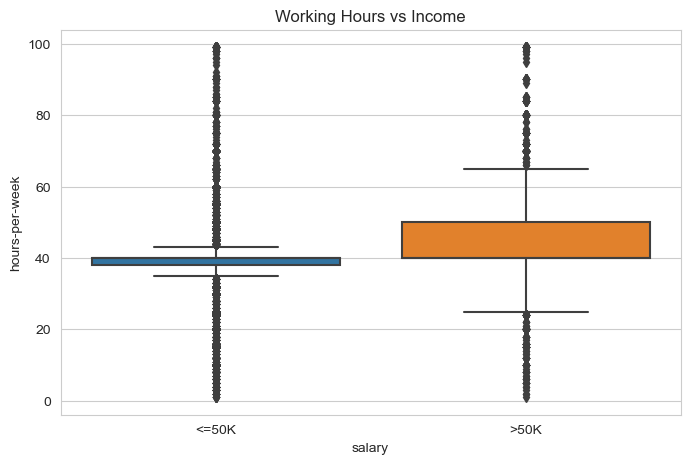

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(x='salary', y='hours-per-week', data=df)
plt.title("Working Hours vs Income")
plt.show()

## 10 Income Comparison by Gender

We compare the percentage of high earners (>50K) between males and females.


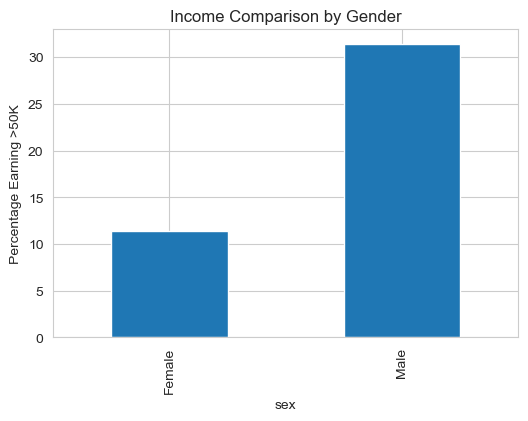

In [30]:
gender_income = (
    df.groupby('sex')['salary']
    .apply(lambda x: (x == '>50K').mean() * 100)
)

gender_income.plot(kind='bar', figsize=(6,4))
plt.title("Income Comparison by Gender")
plt.ylabel("Percentage Earning >50K")
plt.show()

## 11 Marital Status vs Income

We explore how marital status affects income levels.


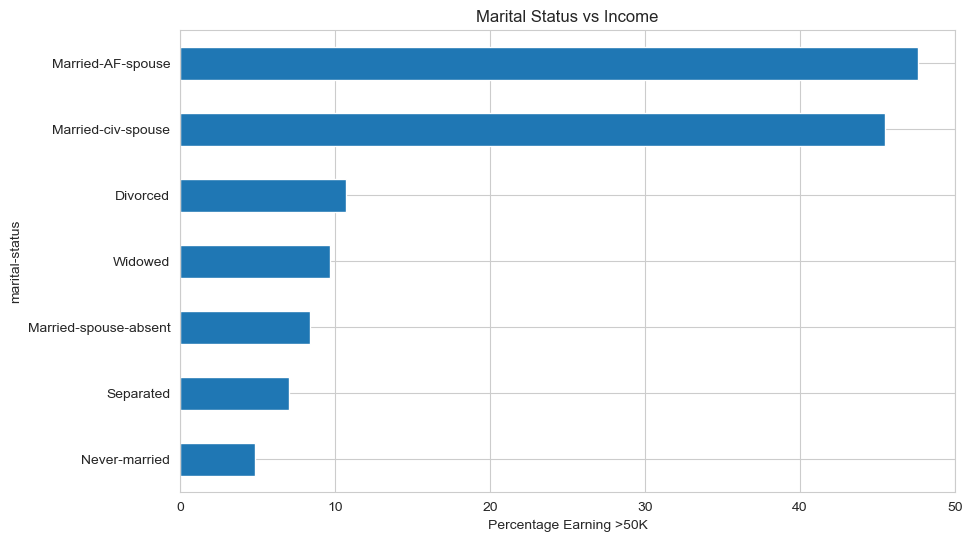

In [31]:
marital_income = (
    df.groupby('marital-status')['salary']
    .apply(lambda x: (x == '>50K').mean() * 100)
    .sort_values()
)

marital_income.plot(kind='barh', figsize=(10,6))
plt.title("Marital Status vs Income")
plt.xlabel("Percentage Earning >50K")
plt.show()

## 12 Top Occupations for High Income

We find the most common occupations among those earning more than 50K.


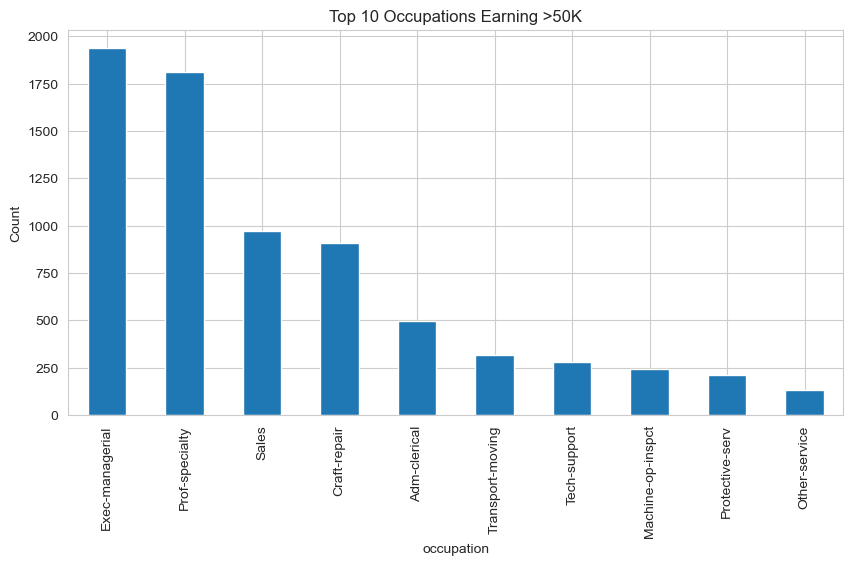

In [32]:
top_occupations = (
    df[df['salary'] == '>50K']
    .groupby('occupation')
    .size()
    .sort_values(ascending=False)
    .head(10)
)

top_occupations.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Occupations Earning >50K")
plt.ylabel("Count")
plt.show()

## Key Insights

- Higher education levels are strongly associated with higher income.
- Individuals working longer hours tend to earn more.
- Married individuals have a higher probability of earning >50K.
- Certain occupations dominate high-income categories.
